In [1]:
import yfinance as yf
import pandas as pd

In [2]:
stock = yf.Ticker("ZI") 
data = stock.history(start="2015-01-01", end="2025-01-01", auto_adjust=False) 

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2020-06-04 00:00:00-04:00,40.000000,42.000000,32.099998,34.000000,34.000000,24801800,0.0,0.0
2020-06-05 00:00:00-04:00,36.500000,40.000000,34.599998,38.889999,38.889999,9110700,0.0,0.0
2020-06-08 00:00:00-04:00,41.900002,47.900002,40.660000,44.689999,44.689999,9020300,0.0,0.0
2020-06-09 00:00:00-04:00,46.930000,51.750000,44.700001,50.000000,50.000000,9200600,0.0,0.0
2020-06-10 00:00:00-04:00,59.220001,64.400002,50.070000,50.299999,50.299999,18098700,0.0,0.0


In [4]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [5]:
close_prices = data[['Close']].values

In [6]:
close_prices

array([[34.        ],
       [38.88999939],
       [44.68999863],
       ...,
       [10.65999985],
       [10.39999962],
       [10.51000023]])

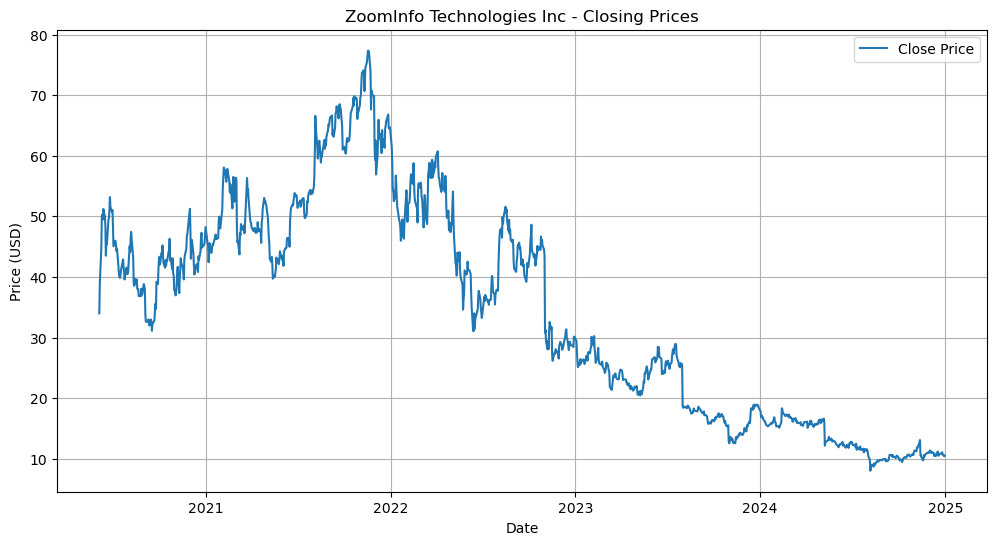

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('ZoomInfo Technologies Inc - Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
split = int(len(close_prices) * 0.8)
train_data = close_prices[:split]
test_data = close_prices[split:]

In [13]:
train_data.shape, test_data.shape

((921, 1), (231, 1))

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [16]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [17]:
scaled_train

array([[3.31224941e-01],
       [4.06664612e-01],
       [4.96143158e-01],
       [5.78062342e-01],
       [5.82690531e-01],
       [5.70348673e-01],
       [5.96883712e-01],
       [5.77599540e-01],
       [5.53224319e-01],
       [4.77938895e-01],
       [5.12496157e-01],
       [5.06633752e-01],
       [5.68960210e-01],
       [5.73125598e-01],
       [5.93181126e-01],
       [6.27275527e-01],
       [6.02283257e-01],
       [5.89170044e-01],
       [5.93952481e-01],
       [5.53378625e-01],
       [5.01697009e-01],
       [5.16198744e-01],
       [5.03085472e-01],
       [4.89509398e-01],
       [4.96143158e-01],
       [4.81024375e-01],
       [4.28880016e-01],
       [4.23634719e-01],
       [4.21474842e-01],
       [4.29651371e-01],
       [4.41684676e-01],
       [4.62048756e-01],
       [4.68528269e-01],
       [4.49398344e-01],
       [4.37056486e-01],
       [4.17463760e-01],
       [4.41684676e-01],
       [4.47855634e-01],
       [4.31965436e-01],
       [4.31194081e-01],


In [18]:
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [19]:
time_step = 60
X_train, y_train = create_sequences(train_scaled, time_step)
X_test, y_test = create_sequences(test_scaled, time_step)

In [20]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (861, 60, 1)
y_train shape: (861, 1)
X_test shape: (171, 60, 1)
y_test shape: (171, 1)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

In [23]:
def build_model_a(time_step):
    model = Sequential()
    model.add(Input(shape=(time_step, 1)))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [24]:
def build_model_b(time_step):
    model = Sequential()
    model.add(Input(shape=(time_step, 1)))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [28]:
model_a = build_model_a(time_step)
history_a = model_a.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1083 - val_loss: 0.0078
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0076 - val_loss: 0.0021
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0059 - val_loss: 5.1531e-04
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0048 - val_loss: 4.8389e-04
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0051 - val_loss: 4.9784e-04
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0049 - val_loss: 2.7723e-04
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0042 - val_loss: 3.3798e-04
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0046 - val_loss: 1.6560e-04
Epoch 9/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0042 - val_loss: 1.9177e-04
Epoch 10/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0044 - val_loss: 2.0761e-04
Epoch 11/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0040 - val_loss: 1.7122e-04
Epoch 12/30
27/27 ━━━━━━━━━

In [30]:
history_a.history['loss']  

[0.04970051720738411,
 0.007323122583329678,
 0.005558311473578215,
 0.004950299859046936,
 0.00491619948297739,
 0.004642908461391926,
 0.004561333917081356,
 0.004437354858964682,
 0.004054728429764509,
 0.00444964412599802,
 0.004094609059393406,
 0.004299649503082037,
 0.0041610728949308395,
 0.004134769551455975,
 0.0037093409337103367,
 0.003587358398362994,
 0.003511750837787986,
 0.003298873780295253,
 0.0034834404941648245,
 0.0035458432976156473,
 0.0035008531995117664,
 0.0029534942004829645,
 0.00306141609326005,
 0.0031457622535526752,
 0.003074029926210642,
 0.0031991680152714252,
 0.0028910546097904444,
 0.0026872833259403706,
 0.0029442058876156807,
 0.0029993164353072643]

In [31]:
history_a.history['val_loss']

[0.007762694265693426,
 0.0021473269443958998,
 0.0005153105594217777,
 0.0004838914319407195,
 0.0004978423239663243,
 0.000277225102763623,
 0.00033797768992371857,
 0.0001656022504903376,
 0.00019176800560671836,
 0.00020760892948601395,
 0.00017121921700891107,
 0.00030444248113781214,
 0.00016162783140316606,
 0.00015501277812290937,
 0.0001533373724669218,
 0.0001403866772307083,
 0.0002408233267487958,
 0.00013479136396199465,
 0.00013609025336336344,
 0.0001362646435154602,
 0.00013266241876408458,
 0.00013695603411179036,
 0.0001266506005777046,
 0.00014408347487915307,
 0.00015862021245993674,
 0.00012672439333982766,
 0.0001304057368542999,
 0.0001404992217430845,
 0.0001419569889549166,
 0.00012623879592865705]

In [32]:
model_b = build_model_b(time_step)
history_b = model_b.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0950 - val_loss: 0.0059
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0099 - val_loss: 3.1508e-04
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0073 - val_loss: 3.0529e-04
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0072 - val_loss: 2.1579e-04
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0059 - val_loss: 1.9396e-04
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0083 - val_loss: 2.7091e-04
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0068 - val_loss: 3.5143e-04
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0066 - val_loss: 2.6296e-04
Epoch 9/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0060 - val_loss: 2.1382e-04
Epoch 10/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0054 - val_loss: 2.1852e-04
Epoch 11/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0061 - val_loss: 2.1141e-04
Epoch 12/30
27/27 ━━━━━

In [33]:
history_b.history['loss']  

[0.043238021433353424,
 0.009141138754785061,
 0.006907899398356676,
 0.007249834015965462,
 0.006371187977492809,
 0.007603843230754137,
 0.006774313747882843,
 0.0070397863164544106,
 0.006326999515295029,
 0.00573433842509985,
 0.005855962168425322,
 0.006012687459588051,
 0.005880686454474926,
 0.004897706676274538,
 0.005073062144219875,
 0.004829582758247852,
 0.005502160172909498,
 0.005113899242132902,
 0.0045934272930026054,
 0.004250987432897091,
 0.004758402239531279,
 0.004387170076370239,
 0.004878888372331858,
 0.004038624465465546,
 0.004091304261237383,
 0.003872465807944536,
 0.004849712364375591,
 0.003791637485846877,
 0.004007444251328707,
 0.00423467718064785]

In [34]:
history_b.history['val_loss']

[0.005909494590014219,
 0.0003150845877826214,
 0.0003052860265597701,
 0.00021578569430857897,
 0.00019395729759708047,
 0.0002709106483962387,
 0.0003514309355523437,
 0.00026296076248399913,
 0.00021382386330515146,
 0.0002185208722949028,
 0.00021140938042663038,
 0.0001798949670046568,
 0.0002203943586209789,
 0.00032126446603797376,
 0.00021461282449308783,
 0.00024556712014600635,
 0.0002987914194818586,
 0.000260311207966879,
 0.0003412257938180119,
 0.00015614001313224435,
 0.00024614654830656946,
 0.00014984235167503357,
 0.0006072215619497001,
 0.00016688469622749835,
 0.00017587782349437475,
 0.00018568336963653564,
 0.0001789421366993338,
 0.00019524304661899805,
 0.0001393170387018472,
 0.000147203856613487]

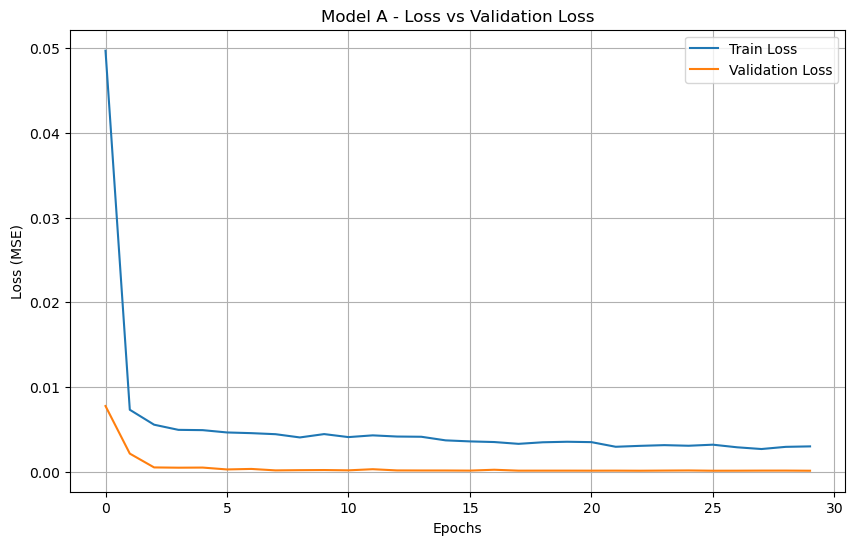

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history_a.history['loss'], label='Train Loss')
plt.plot(history_a.history['val_loss'], label='Validation Loss')
plt.title('Model A - Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

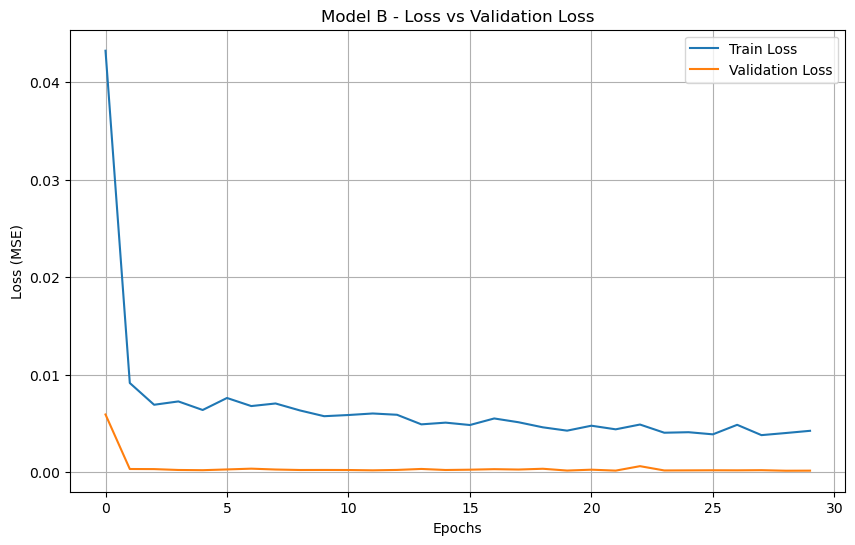

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(history_b.history['loss'], label='Train Loss')
plt.plot(history_b.history['val_loss'], label='Validation Loss')
plt.title('Model B - Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Predict for both models
predicted_a_scaled = model_a.predict(X_test)
predicted_b_scaled = model_b.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [42]:
predicted_a = scaler.inverse_transform(predicted_a_scaled)
predicted_b = scaler.inverse_transform(predicted_b_scaled)
actual = scaler.inverse_transform(y_test)

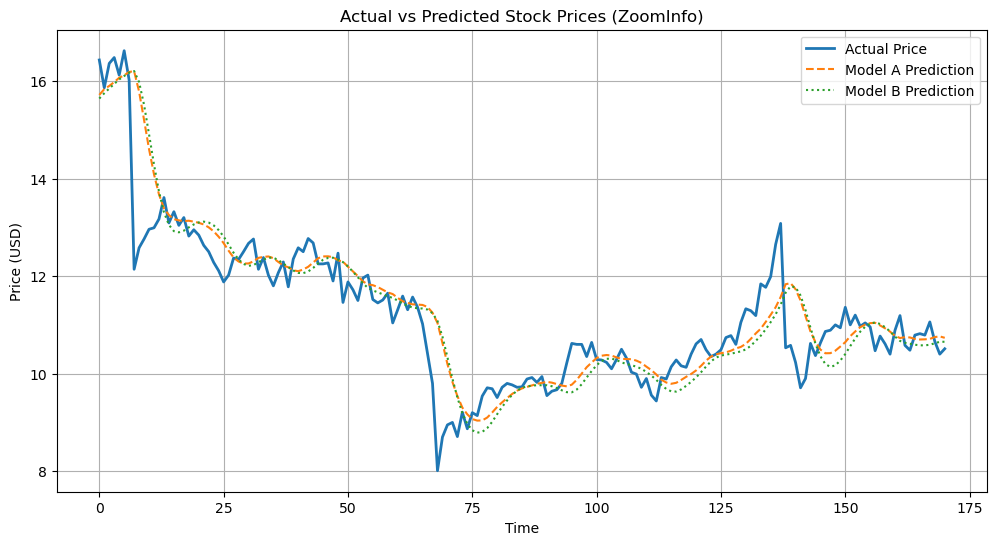

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price', linewidth=2)
plt.plot(predicted_a, label='Model A Prediction', linestyle='--')
plt.plot(predicted_b, label='Model B Prediction', linestyle=':')
plt.title('Actual vs Predicted Stock Prices (ZoomInfo)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_a = np.sqrt(mean_squared_error(actual, predicted_a))
rmse_b = np.sqrt(mean_squared_error(actual, predicted_b))

mae_a = mean_absolute_error(actual,predicted_a)
mae_b = mean_absolute_error(actual,predicted_b)

print("Model A RMSE:", rmse_a)
print("Model B RMSE:", rmse_b)

print("Model A MAE:", mae_a)
print("Model B MAE:", mae_b)

Model A RMSE: 0.7282918342515834
Model B RMSE: 0.7864454283971355
Model A MAE: 0.45996892382526955
Model B MAE: 0.5137708563553659
